# 线性回归（闭式解）

### 1. 导入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg

### 2. 导入和分割数据集

In [5]:
Dataset = load_svmlight_file('housing_scale.txt', n_features=13)
X_train, X_val, y_train, y_val = train_test_split(Dataset[0], Dataset[1], test_size=0.2, random_state=666)

### 3.构建线性模型

### y=wx

### 损失函数

In [8]:
def L2Loss(y, y_):
    return ((y-y_)**2)

def L1Loss(y, y_):
    return np.abs(y-y_)

Loss = L2Loss

### 4.在验证集上初次计算损失函数

In [10]:
W = np.random.normal(size=(13))
pred_init = X_train.dot(W)
loss_init = Loss(pred_init, y_train)
print('mean(loss) = {}'.format(loss_init.mean()))

mean(loss) = 535.5494611990732


### 5. 闭式解 

In [11]:
W = linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(W)

[-12.89846168   2.11697736  -0.16889706   0.37318817  -5.83812818
   9.66599555   0.86771473 -11.03211998   4.38671459  -2.86453302
  -4.72490141   2.63947781 -10.13965855]


### 6.在训练集上计算损失

In [12]:
pred_train = X_train.dot(W)
loss_train = Loss(pred_train, y_train)
print('mean(loss_train) = {}'.format(loss_train.mean()))

mean(loss_train) = 23.726942024006856


### 7. 计算验证集上的损失 

In [13]:
pred_val = X_val.dot(W)
loss_val = Loss(pred_val, y_val).mean()
print('mean(loss_val) = {}'.format(loss_val.mean()))

mean(loss_val) = 27.20850718361358


### 8.绘图

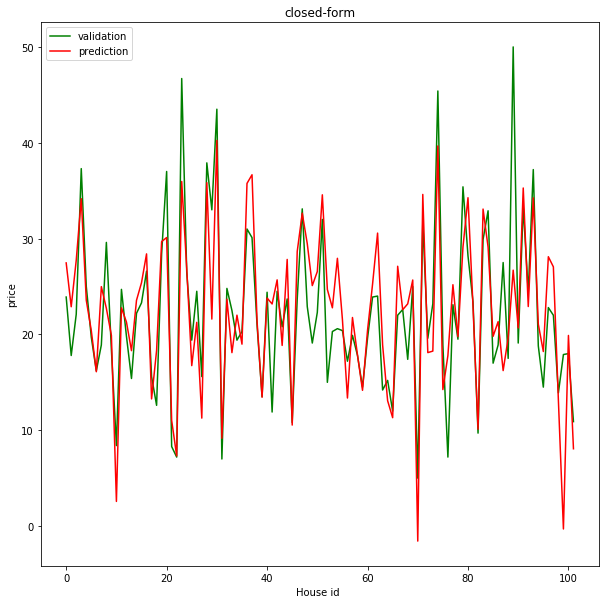

In [18]:
plt.figure(figsize=[10,10])
plt.title('closed-form')
plt.xlabel('House id ')
plt.ylabel('price')
plt.plot(y_val,c='g', label='validation')
plt.plot(pred_val,c='r', label='prediction')
plt.legend()
plt.show()